student_name   subject  mark
         Ann      Math  88.0
         Ann   Physics  91.0
         Ann Chemistry  74.0
         Ann   English  78.0
         Ann        CS  82.0
         Joe      Math  69.0
         Joe   Physics  80.0
         Joe Chemistry  60.0
         Joe   English  65.0
         Joe        CS  70.0
        Mark      Math  95.0
        Mark   Physics  88.0
        Mark Chemistry  92.0
        Mark   English  90.0
        Mark        CS  85.0
        Sara      Math  77.0
        Sara   Physics  75.0
        Sara Chemistry  70.0
        Sara   English  72.0
        Sara        CS  68.0


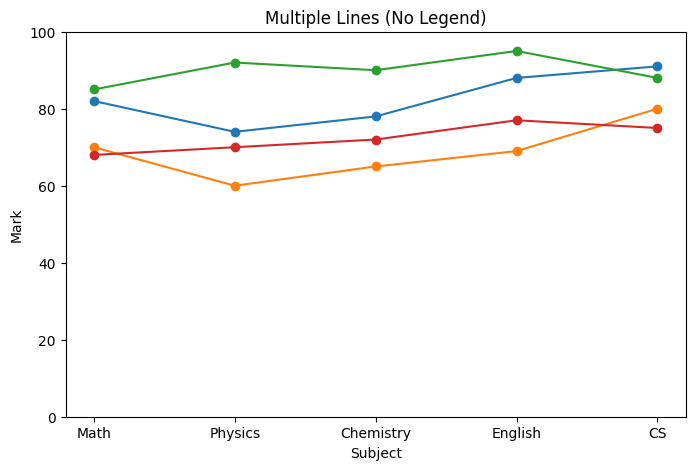

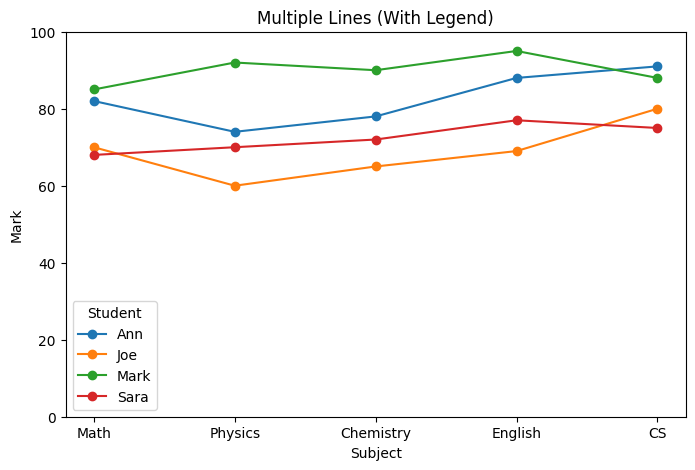

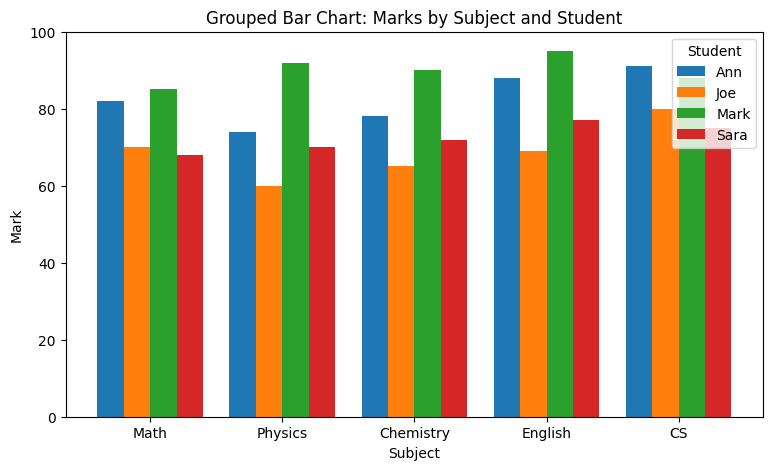

('/mnt/data/figs\\req8_lines_no_legend.png',
 '/mnt/data/figs\\req8_lines_with_legend.png',
 '/mnt/data/figs\\req8_grouped_bar.png')

In [1]:
# === REQUIREMENT 8 — ONE-CELL, SELF-CONTAINED (JUPYTER) ===
# Plots:
#   1) Multiple lines (no legend)
#   2) Multiple lines (with legend)
#   3) Grouped bar chart
# Data format: team scores with EXACTLY 5 subjects per student.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 0) EDITABLE DATA ----------
SUBJECTS = ["Math", "Physics", "Chemistry", "English", "CS"]
TEAM_DATA = {
    # student_name: [marks over the 5 subjects in SUBJECTS order]
    "Ann":  [88, 91, 74, 78, 82],
    "Joe":  [69, 80, 60, 65, 70],
    "Mark": [95, 88, 92, 90, 85],
    "Sara": [77, 75, 70, 72, 68],
}

# ---------- 1) Build long-format DataFrame ----------
for name, marks in TEAM_DATA.items():
    if len(marks) != len(SUBJECTS):
        raise ValueError(f"Student '{name}' must have {len(SUBJECTS)} marks; got {len(marks)}")

rows = [{"student_name": s, "subject": subj, "mark": float(m)}
        for s, marks in TEAM_DATA.items()
        for subj, m in zip(SUBJECTS, marks)]
df = pd.DataFrame(rows, columns=["student_name", "subject", "mark"])

# Display dataset table (interactive if supported)
try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Requirement 8 - Team Scores", df)
except Exception:
    print(df.to_string(index=False))

# ---------- 2) Prepare structures ----------
pivot = df.pivot(index="subject", columns="student_name", values="mark")
subjects_idx = np.arange(len(SUBJECTS))
save_dir = "/mnt/data/figs"; os.makedirs(save_dir, exist_ok=True)

# ---------- 3A) Multiple lines (NO legend) ----------
plt.figure(figsize=(8,5))
for student in pivot.columns:
    plt.plot(SUBJECTS, pivot[student].values, marker="o")  # default colors only
plt.title("Multiple Lines (No Legend)")
plt.xlabel("Subject"); plt.ylabel("Mark")
plt.ylim(0, 100)
path_a = os.path.join(save_dir, "req8_lines_no_legend.png")
plt.savefig(path_a, bbox_inches="tight")
plt.show()

# ---------- 3B) Multiple lines (WITH legend) ----------
plt.figure(figsize=(8,5))
for student in pivot.columns:
    plt.plot(SUBJECTS, pivot[student].values, marker="o", label=student)  # default colors only
plt.title("Multiple Lines (With Legend)")
plt.xlabel("Subject"); plt.ylabel("Mark")
plt.ylim(0, 100); plt.legend(title="Student")
path_b = os.path.join(save_dir, "req8_lines_with_legend.png")
plt.savefig(path_b, bbox_inches="tight")
plt.show()

# ---------- 3C) Grouped bar chart ----------
plt.figure(figsize=(9,5))
n_students = len(pivot.columns)
bar_width = 0.8 / n_students
for i, student in enumerate(pivot.columns):
    pos = subjects_idx + i * bar_width - (0.8 - bar_width) / 2
    plt.bar(pos, pivot[student].values, width=bar_width, label=student)  # default colors only
plt.title("Grouped Bar Chart: Marks by Subject and Student")
plt.xlabel("Subject"); plt.ylabel("Mark")
plt.xticks(subjects_idx, SUBJECTS); plt.ylim(0, 100); plt.legend(title="Student")
path_c = os.path.join(save_dir, "req8_grouped_bar.png")
plt.savefig(path_c, bbox_inches="tight")
plt.show()

# Output saved paths for convenience
(path_a, path_b, path_c)
